**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [107]:
# insert code here
!pip install ucimlrepo

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

print("_____________________________________________________________________________________________________________________________________________________________________")
# variable information
print(heart_disease.variables)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [108]:
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


In [109]:
#Separate features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [110]:
# insert code here
print(df.dtypes)
print("\n")
print(df.isnull().sum())

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [111]:
#Filling the missing data with the mean value
df = df.fillna(df.mean())


print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [112]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
df = scaler.fit_transform(df)

print(df)


[[ 0.94872647  0.68620244 -2.25177456 ... -0.72309499  0.65581797
  -0.76419779]
 [ 1.39200191  0.68620244  0.87798549 ...  2.50385129 -0.89852225
   0.86644961]
 [ 1.39200191  0.68620244  0.87798549 ...  1.42820253  1.17393137
   0.05112591]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.35255377  1.17393137
   1.68177331]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.35255377 -0.89852225
   0.05112591]
 [-1.82174501  0.68620244 -0.16526786 ...  0.         -0.89852225
  -0.76419779]]


# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [124]:
# insert code here
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

model = XGBClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print()
print("Accuracy:", accuracy)


Accuracy: 0.47540983606557374


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [114]:
# insert code here
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#testing hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy',n_jobs=-1,cv=5)

grid_search.fit(X_train, y_train)

#best parameters
print( grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [116]:
bettermodel = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100)

bettermodel.fit(X_train, y_train)

betterpredictions = bettermodel.predict(X_test)
accuracy2 = accuracy_score(y_test, betterpredictions)
print("Accuracy:", accuracy2)


Accuracy: 0.5245901639344263


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

([<matplotlib.axis.YTick at 0x7852102db610>,
 [Text(0, 0, 'restecg'),
  Text(0, 1, 'trestbps'),
  Text(0, 2, 'chol'),
  Text(0, 3, 'age'),
  Text(0, 4, 'fbs'),
  Text(0, 5, 'thalach'),
  Text(0, 6, 'sex'),
  Text(0, 7, 'oldpeak'),
  Text(0, 8, 'slope'),
  Text(0, 9, 'exang'),
  Text(0, 10, 'thal'),
  Text(0, 11, 'ca'),
  Text(0, 12, 'cp')])

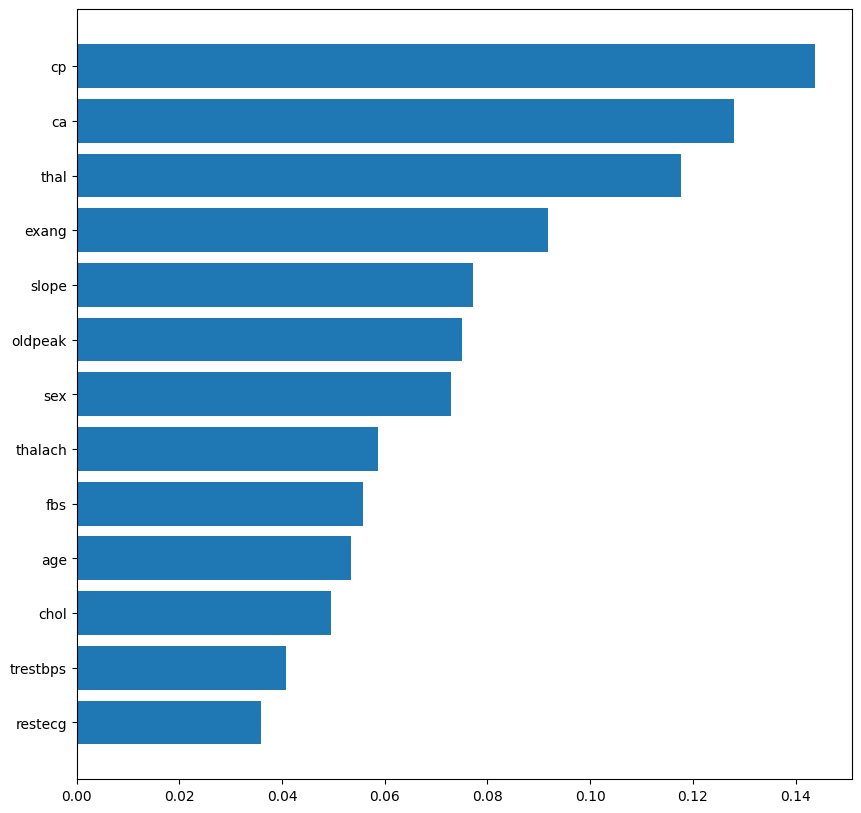

In [121]:
# insert code here
import numpy as np
import matplotlib.pyplot as plt

feature_importance = bettermodel.feature_importances_

sorted_indices = np.argsort(feature_importance)

fig = plt.figure(figsize=(10,10))
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), np.array(X_test.columns)[sorted_indices])


In [ ]:
#features are sorted from the most to the less important

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [127]:
# insert code here

precision = precision_score(y_test, predictions,average='weighted')
precision2 = precision_score(y_test, betterpredictions,average='weighted')

recall = recall_score(y_test, predictions,average='weighted')
recall2 = recall_score(y_test, betterpredictions,average='weighted')

#we already calculated accuracy of both models

print("Accuracy of not tuned model:", accuracy)
print("Accuracy of tuned model:", accuracy2)
print()
print("precision of not tuned model:", precision)
print("precision2 of tuned model:", precision2)
print()
print("recall of not tuned model:", recall)
print("recall2 of tuned model:", recall2)
print()
print("THe tuned model has better performances")
print()

Accuracy of not tuned model: 0.47540983606557374
Accuracy of tuned model: 0.5245901639344263

precision of not tuned model: 0.4074011571841851
precision2 of tuned model: 0.4495316159250586

recall of not tuned model: 0.47540983606557374
recall2 of tuned model: 0.5245901639344263

THe tuned model has better performances



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
